In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [4]:
df.dropna()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df['target']=encoder.fit_transform(df['target'])

In [8]:
# 1 spam
# 0 ham

In [9]:
df.duplicated().sum()

403

In [10]:
df=df.drop_duplicates()

In [11]:
import nltk

In [12]:
df['num_char']=df['text'].apply(len)

In [13]:
df['word_char']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
df

,target,text,num_char,word_char
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [15]:
df['sent']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [16]:
df

,target,text,num_char,word_char,sent
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [17]:
import matplotlib.pyplot as plt

In [18]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [19]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [20]:
df['text']=df['text'].apply(transform_text)

In [21]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

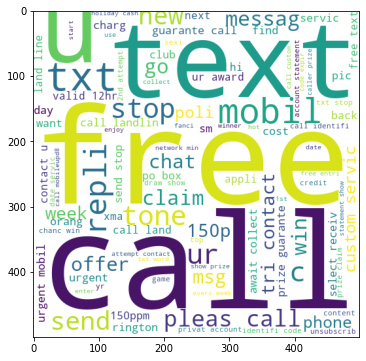

In [30]:
spam_wc = wc.generate(df[df['target'] == 1]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

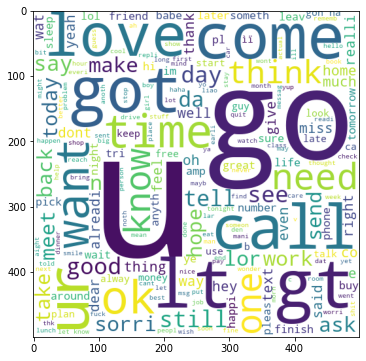

In [31]:
ham_wc = wc.generate(df[df['target'] == 0]['text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [25]:
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [64]:
x=tfidf.fit_transform(df['text']).toarray()

In [65]:
y = df['target'].values

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [88]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [93]:
y_train.shape


(4135,)

In [72]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [73]:
MN=MultinomialNB()
GB =GaussianNB()
BN=BernoulliNB()

In [74]:
MN.fit(X_train,y_train)

MultinomialNB()

In [92]:
y_pred=MN.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [76]:
y_test.shape

(1034,)

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
accuracy_score(y_test,y_pred)

0.971953578336557

In [79]:
MN.fit(X_train,y_train)
y_pred=MN.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.971953578336557
[[888   1]
 [ 28 117]]
0.9915254237288136


In [80]:
GB.fit(X_train,y_train)
y_pred=GB.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.851063829787234
[[760 129]
 [ 25 120]]
0.4819277108433735


In [81]:
BN.fit(X_train,y_train)
y_pred=BN.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))


0.9738878143133463
[[886   3]
 [ 24 121]]
0.9758064516129032


In [82]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandoBreast Cancer PredictormForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [83]:
svc=SVC(gamma=1.0,kernel='sigmoid')
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
rf=RandomForestClassifier(n_estimators=50,random_state=2)
exc=ExtraTreesClassifier(n_estimators=50,random_state=2)
ad=AdaBoostClassifier(n_estimators=50,random_state=2)
gb=GradientBoostingClassifier(n_estimators=50,random_state=2)
xg=XGBClassifier(n_estimators=50,random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [84]:
clfs ={
    
    'SVC':svc,
    'knn':knn,
    'dtc':dtc,
    'rf':rf,
    'exc':exc,
    'ad':ad,
    'gb':gb,
    'xg':xg,
    'lrc':lrc
    
    
    
}

In [94]:
def model_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    return accuracy,precision

In [95]:
model_classifier(knn,X_train,X_test,y_train,y_test)


(0.9032882011605415, 1.0)